In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
train.shape, test.shape

((10506, 12), (116293, 11))

## Summary
* The number of rows in test dataset is about 11 times of train data.
* Test data doesn't have NumMosquitos, so we can't use this feature in our model !!!
* column 'Data' is an Object, need to convert to time
* Unique species 'UNSPECIFIED CULEX' in test data accounts for ~ 1/8 of the population 
* Test data presents unique addresses, they account for 8.5% of the population

In [3]:
pd.set_option('display.max_columns', 100)
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [4]:
#Check the difference in columns between train and test fiel
print("Train data has unique columns: ", set(train.columns).difference(set(test.columns)))
print("Test data has unique columns: ", set(test.columns).difference(set(train.columns)))


# Test data doesn't have NumMosquitos, so we can't use this feature in our model !!!
# Test data doesn't have the outcome - expected

Train data has unique columns:  {'WnvPresent', 'NumMosquitos'}
Test data has unique columns:  {'Id'}


In [5]:
test.describe()

# Data looks complete and no abnormal data points - clean dataset

,Id,Block,Latitude,Longitude,AddressAccuracy
count,116293.000000,116293.000000,116293.000000,116293.000000,116293.000000
mean,58147.000000,41.131100,41.849389,-87.693658,7.954357
std,33571.041765,24.864726,0.106593,0.080699,1.252733
min,1.000000,10.000000,41.644612,-87.930995,3.000000
25%,29074.000000,18.000000,41.753411,-87.750938,8.000000
50%,58147.000000,39.000000,41.862292,-87.694991,8.000000
75%,87220.000000,61.000000,41.951866,-87.648860,9.000000
max,116293.000000,98.000000,42.017430,-87.531635,9.000000


In [6]:
test.info()

# Date is in the wrong format?
# No mssing data or wrong datatype except Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
Id                        116293 non-null int64
Date                      116293 non-null object
Address                   116293 non-null object
Species                   116293 non-null object
Block                     116293 non-null int64
Street                    116293 non-null object
Trap                      116293 non-null object
AddressNumberAndStreet    116293 non-null object
Latitude                  116293 non-null float64
Longitude                 116293 non-null float64
AddressAccuracy           116293 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


>Data is very clean, no missing data or abnormal entries

### Convert the Date column to datetime format

In [7]:
train['date'] = pd.to_datetime(train.Date, format='%Y-%m-%d')
test['date'] = pd.to_datetime(test.Date, format='%Y-%m-%d')

#train['date'] = pd.to_datetime(train.Date, format='%d/%m/%Y')
#test['date'] = pd.to_datetime(test.Date, format='%d/%m/%Y')
#test['year'] = test.date.dt.year
#test['month'] = test.date.dt.month
#test['week'] = test.date.dt.week

In [8]:
#s = test.date.asfreq(freq='m')
#s1 = pd.Series(s[s.isnull()].index)
#print(s.shape)

C:\Users\dai_f\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


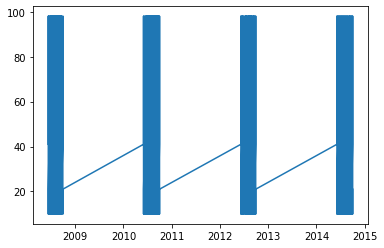

In [9]:
plt.plot(test.date, test.Block)

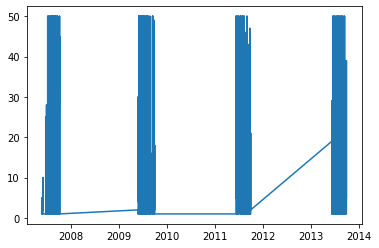

In [10]:
plt.plot(train.date, train.NumMosquitos)

> test years are even, train years are odd

In [11]:
# Define a fuction to find the unique values in a column between train and test dataset
def find_unique(col):
    name_train = set(train[col].value_counts().index)
    name_test = set(test[col].value_counts().index)
    print("Train has unique name: ", name_train.difference(name_test))
    print()
    print(f"Test has unique name: ", name_test.difference(name_train))
    return name_test.difference(name_train)

#### Mosquitoe Species in train and test

* Unique species 'UNSPECIFIED CULEX' in test data accounts for ~ 1/8 of the population 

In [12]:
find_unique('Species')

Train has unique name:  set()

Test has unique name:  {'UNSPECIFIED CULEX'}


{'UNSPECIFIED CULEX'}

In [13]:
test.Species.value_counts(normalize=True)

# train data has higher proportion of PIPIENS/RESTUANS than any other species, however test dat has equal proportion of all species
# Unique species 'UNSPECIFIED CULEX' in test data accounts for ~ 1/8 of the population 
# Does it means that the model we build can't account for 1/8 of the data accurately, if Species is part of the features?

CULEX PIPIENS/RESTUANS    0.132072
CULEX RESTUANS            0.126147
CULEX PIPIENS             0.124866
CULEX SALINARIUS          0.123438
CULEX TERRITANS           0.123404
CULEX TARSALIS            0.123369
UNSPECIFIED CULEX         0.123352
CULEX ERRATICUS           0.123352
Name: Species, dtype: float64

#### Mosquito Trap Location in train and test

* Test data presents new addresses, they account for 8.5% of the population!

In [14]:
unique_addr = find_unique('Address')

# 13 locations are unique

Train has unique name:  set()

Test has unique name:  {'6500 West Dakin Street, Chicago, IL 60634, USA', 'South Oglesby Avenue, Chicago, IL, USA', '2900 North Kenneth Avenue, Chicago, IL 60641, USA', 'South Baltimore Avenue, Chicago, IL 60617, USA', '1100 South Loomis Street, Chicago, IL 60607, USA', '5100 West 63rd Place, Chicago, IL 60638, USA', '4600 North Melvina Avenue, Chicago, IL 60630, USA', '3400 North Long Avenue, Chicago, IL 60641, USA', '3700 North Kilbourn Avenue, Chicago, IL 60641, USA', '2600 East 136th Street, Chicago, IL 60633, USA', '1400 West 112th Street, Chicago, IL 60643, USA', '4000 North Kedvale Avenue, Chicago, IL 60641, USA', '1200 West 120th Street, Chicago, IL 60643, USA'}


In [15]:
unique_traps = find_unique('Trap')

# ALso 13 unique locations. Address and Trap should pair up
# All are satelite traps except T234. - mosquitto hotspots? Where is T234?
# When are they inserted?
# Where are these 'hotspots' on the map?

Train has unique name:  set()

Test has unique name:  {'T218B', 'T090C', 'T234', 'T065A', 'T090A', 'T200B', 'T128A', 'T002A', 'T200A', 'T218A', 'T002B', 'T090B', 'T218C'}


In [16]:
addr_count = test.Address.value_counts()
unique_addr_count = [addr_count.loc[loc] for loc in unique_addr]
unique_addr_count

[760, 760, 762, 766, 760, 767, 760, 760, 762, 760, 768, 760, 760]

In [17]:
sum(unique_addr_count)/len(test)

# Unique address seen in test accounts for 8.5% of the population

0.08517279629900337

### Number of Traps per day per location per Species in Test

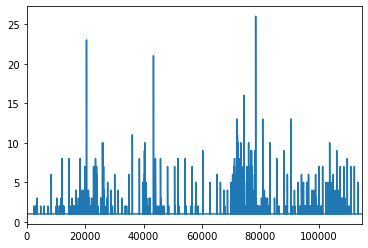

In [18]:
test.groupby(['Date','Address','Trap','Species']).count().reset_index()['Block'].plot()

# On a single date, in a single location, for a single species, there are rows that have multiple rows that's as high as 25.
# Meaning: the number of mosquito pools for a specific mosquito testdate/location/species can vary between 1-25 

In [19]:
test.head(20)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,date
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
5,6,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TARSALIS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
6,7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
7,8,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX ERRATICUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,2008-06-11
8,9,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,2008-06-11
9,10,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,2008-06-11
